In [21]:
import numpy as np
import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
set_option('precision', 3)

# Simple Linear Regression with Stochastic Gradient Descent

Our linear regression model is defined as follows: <br/>
y = B0 + B1 × x

In [145]:
x = [1,2,4,3,5]
y = [1,3,3,2,5]

## Gradient Descent

In [146]:
B0 = 0.0
B1 = 0.0
error_list = []

We can calculate the error for a prediction as follows: <br/>
**error = p(i) − y(i)** <br/>
Where p(i) is the prediction for the i’th instance in our dataset and y(i) is the i’th output
variable for the instance in the dataset. We can now calculate the predicted value for y using
our starting point coefficients for the first training instance: x = 1, y = 1.

In [147]:
p = B0 + B1 * x[0]
print("The Prediction is : ", p)
error = p - y[0]
print("The error is : {}".format(error))
error_list.append(error)

The Prediction is :  0.0
The error is : -1.0


We can now use this error in our equation for gradient descent to update the weights. <br/>
alpha is the learning rate, error is the error calculated above and x is the input value

In [148]:
alpha = 0.01
B0 = B0 - alpha * error
B1 = B1 - alpha * error * x[0]
print("Updated coefficients B0: {} and B1: {}".format(B0,B1))

Updated coefficients B0: 0.01 and B1: 0.01


This process must be repeated for the remaining 4 instances from our dataset. One pass through the training dataset is called an epoch.

In [149]:
for i in range(1,20):
    print("iteration # ", i+1)
    instance = i%len(x)
    print("The index of the array ", instance)
    p = B0 + B1 * x[instance]
    error = p - y[instance]
    alpha = 0.01
    B0 = B0 - alpha * error
    B1 = B1 - alpha * error * x[instance]
    print("Error is ", error)
    print("Updated coefficients B0: {} and B1: {}".format(B0,B1))
    error_list.append(error)

iteration #  2
The index of the array  1
Error is  -2.97
Updated coefficients B0: 0.039700000000000006 and B1: 0.0694
iteration #  3
The index of the array  2
Error is  -2.6827
Updated coefficients B0: 0.066527 and B1: 0.176708
iteration #  4
The index of the array  3
Error is  -1.403349
Updated coefficients B0: 0.08056049 and B1: 0.21880847
iteration #  5
The index of the array  4
Error is  -3.8253971599999996
Updated coefficients B0: 0.1188144616 and B1: 0.410078328
iteration #  6
The index of the array  0
Error is  -0.47110721040000003
Updated coefficients B0: 0.123525533704 and B1: 0.414789400104
iteration #  7
The index of the array  1
Error is  -2.046895666088
Updated coefficients B0: 0.14399449036488 and B1: 0.45572731342576
iteration #  8
The index of the array  2
Error is  -1.03309625593208
Updated coefficients B0: 0.1543254529242008 and B1: 0.4970511636630432
iteration #  9
The index of the array  3
Error is  -0.3545210560866696
Updated coefficients B0: 0.1578706634850675 and

Below is a plot of the error for each set of coefficients as the learning process unfolded. This is a useful graph as it shows us that error was decreasing with each iteration

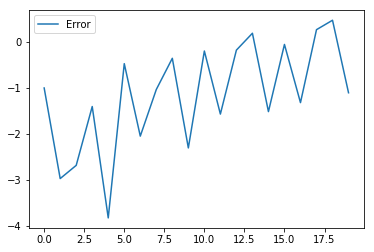

In [150]:
fig, ax = plt.subplots(1, 1)
ax.plot(error_list, label='Error')
plt.legend()

In [151]:
print("Final coefficients have the values B0 = {} and B1 = {}".format(B0,B1))

Final coefficients have the values B0 = 0.23089749104812557 and B1 = 0.7904386101794071


Let’s plug them into our simple linear Regression model and make a prediction for each point
in our training dataset.

In [152]:
prediction = []
for i in x:
    prediction.append(B0 + B1 * i)

In [153]:
prediction

[1.0213361012275326,
 1.8117747114069398,
 3.3926519317657537,
 2.6022133215863468,
 4.183090541945161]

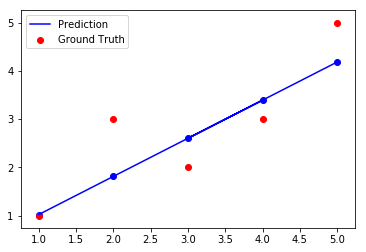

In [154]:
fig, ax = plt.subplots(1, 1)
ax.plot(x,prediction, c='b', label='Prediction')
ax.scatter(x,prediction, c='b')
ax.scatter(x,y, c='r',label='Ground Truth',)
plt.legend()

In [155]:
import math

In [156]:
RMSE = math.sqrt(((np.array(prediction) - np.array(y))**2).sum()/len(x))
print("RMSE or each prediction is on average wrong by about {} units".format(RMSE))

RMSE or each prediction is on average wrong by about 0.7206264014789554 units
